<a href="https://colab.research.google.com/github/aisyatullatifah/Data_Mining/blob/main/Aisyatul_Latifah_4101422036_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [60]:
#pemanggilan data
titanic = pd.read_csv("Titanic-Dataset.csv")

In [61]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
titanic.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


# **1. Eksplorasi Awal**

a. Berapakah jumlah total penumpang dalam data?

In [63]:
total_penumpang = len(titanic)
print("Jumlah total penumpang:", total_penumpang)

Jumlah total penumpang: 891


Berdasarkan hasil output, data Titanic yang mencatat jumlah total penumpang sebanyak 891 orang.

b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.

In [64]:
# Jumlah penumpang yang selamat dan tidak selamat
survival_table = titanic['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'}).reset_index()

# Tabel penumpang selamat dan tidak selamat
print(survival_table)

        Survived  count
0  Tidak Selamat    549
1        Selamat    342


Dari tabel tersebut, diperoleh informasi bahwa penumpang yang dinyatakan selamat sejumlah 342 orang dan penumpang tidak selamat sebanyak 549 penumpang.

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


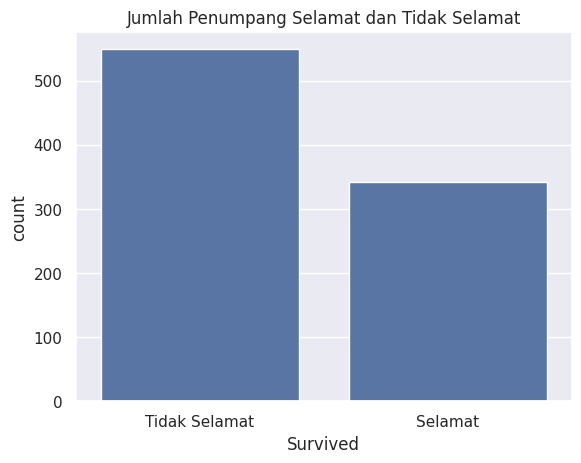

In [65]:
# Membuat DataFrame baru supaya hasilnya berbentuk tabel
survival_counts = titanic['Survived'].value_counts() # Assign the result of value_counts() to survival_counts
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': [survival_counts[0], survival_counts[1]]
})

# Tampilkan tabel
print(survival_table)

# Grafik
sns.countplot(x='Survived', data=titanic) # Change data to titanic
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])  # Ubah label 0 jadi "Tidak Selamat", 1 jadi "Selamat"
plt.show()

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [66]:
# Menghitung rata-rata umur prnumpang
rata_rata_umur = titanic['Age'].mean()
print(rata_rata_umur)

29.69911764705882


Rata-rata umur penumpang kapal Titanic yaitu 29,70 tahun.

In [67]:
# Penumpang termuda
penumpang_termuda = titanic[titanic['Age'] == titanic['Age'].min()][['Name', 'Age']]
print(penumpang_termuda)

                                Name   Age
803  Thomas, Master. Assad Alexander  0.42


Diperoleh informasi bahwa Thomas, Master. Assad Alexander adalah penumpang termuda dengan umur 0,42 tahun atau sekitar 5 bulan.

In [68]:
# Penumpang tertua
penumpang_tertua = titanic[titanic['Age'] == titanic['Age'].max()][['Name', 'Age']]
print(penumpang_tertua)

                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


Diperoleh informasi bahwa Barkworth, Mr. Algernon Henry Wilson adalah penumpang tertua dengan umur 80 tahun.

d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan.

In [69]:
# Jumlah penumpang berdasarkan jenis kelamin
gender_counts = titanic['Sex'].value_counts().reset_index()
gender_counts.columns = ['Jenis Kelamin', 'Jumlah']
print(gender_counts)

  Jenis Kelamin  Jumlah
0          male     577
1        female     314


Penumpang dengan jenis kelamin laki-laki (male) sebanyak 577 penumpang dan jenis kelamin perempuan (female) sebanyak 314 penumpang.

<ipython-input-70-c2f23be2ffb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='Jenis Kelamin', y='Jumlah', palette='winter')


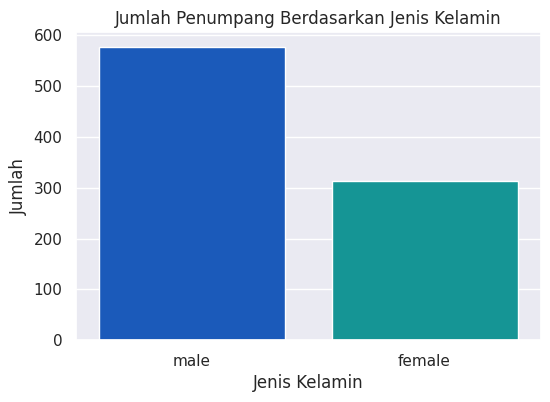

In [70]:
# Visualisasi jumlah penumpang berdasarkan jenis kelamin
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_counts, x='Jenis Kelamin', y='Jumlah', palette='winter')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan diagram diatas, dapat disimpulkan bahwa jumlah penumpang laki-laki (male) paling banyak

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [71]:
# Hitung jumlah penumpang berdasarkan kelas
pclass_counts = titanic['Pclass'].value_counts().sort_index()
total_penumpang = len(titanic)
persen_kelas1 = (pclass_counts[1] / total_penumpang) * 100
persen_kelas2 = (pclass_counts[2] / total_penumpang) * 100
persen_kelas3 = (pclass_counts[3] / total_penumpang) * 100
print(persen_kelas1, persen_kelas2, persen_kelas3)

24.242424242424242 20.65095398428732 55.106621773288445


Diperoleh persentasi pada kelas 1 sebesar 24,24%; pada kelas 2 sebesar 20,65%; dan pada kelas 3 diperoleh sebesar 55,11%.

In [72]:
# Menyajikan dalam tabel
print("Jumlah Penumpang per Kelas:\n", pclass_counts)
print(f"\nPersentase penumpang di kelas 1: {persen_kelas1:.2f}%")
print(f"Persentase penumpang di kelas 2: {persen_kelas2:.2f}%")
print(f"Persentase penumpang di kelas 3: {persen_kelas3:.2f}%")

Jumlah Penumpang per Kelas:
 Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Persentase penumpang di kelas 1: 24.24%
Persentase penumpang di kelas 2: 20.65%
Persentase penumpang di kelas 3: 55.11%


Berdasarkan hasil output diperoleh jumlah penumpang pada kelas 1 sebanyak 216, kelas 2 sebanyak 184, dan kelas 3 sebanyak 491.

<ipython-input-73-cd80e98fe15a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette="winter")


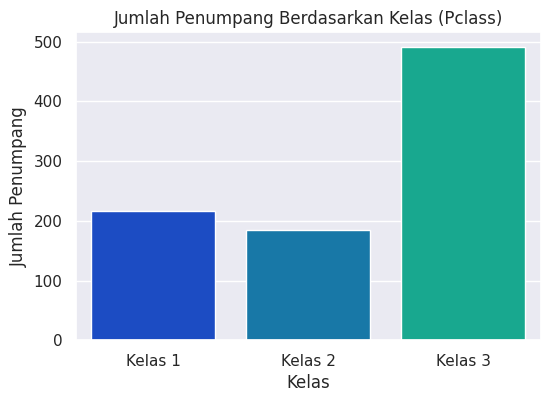

In [73]:
# Visualisasi grafik
plt.figure(figsize=(6,4))
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette="winter")
plt.title("Jumlah Penumpang Berdasarkan Kelas (Pclass)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Penumpang")
plt.xticks([0, 1, 2], ['Kelas 1', 'Kelas 2', 'Kelas 3'])
plt.show()

# **2. Preprocessing**

a. Apakah terdapat missing value pada data tersebut?

In [74]:
# Deteksi Missing Value
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
np.sum(titanic.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Berdasarkan output summarize, diperoleh bahwa terdapat missing values pada kolom Age, Cabin, dan Embarked.

Pada kolom Age terdapat sebanyak 177 data hilang.

Pada kolom Cabin sebanyak 687 data hilang.

Pada kolom Embarked terdapat sebanyak 2 data hilang.

In [76]:
#mengetahui jumlah missing value di seluruh dataset
missing_values = titanic.isnull().sum()
missing_percentage = (missing_values / len(titanic)) * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


b. Jika ya, apa yang anda lakukan?

Jika terdapat missing value pada data tersebut, perlu dilakukan penanganan missing value yang bisa dilakukan dengan menambah atau mengurangi, tetapi pada missing value padadata ini kita mneggunakan imputasi (mean, median, modus).

# **Missing Value pada Kolom Age**

In [77]:
# Melihat Isi Dalam Kolom Age
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [78]:
# Penanganan Missing Value Kolom Cabin dengan 'Unknown'
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-78-ee527c915224>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


Pada kolom Age, menggunakan penanganan missing values berupa imputasi median dikarenakan data Age (umur) merupakan jenis data numerik kontinu serta biasanya data memiliki distribusi yang tidak normal.

In [79]:
# Missing Value Setelah Imputasi
print("setelah:", titanic['Age'].isnull().sum())

setelah: 0


# **Missing Value pada Cabin**

In [80]:
# Melihat Isi Dalam Kolom Cabin
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [81]:
# Penanganan Missing Value Kolom Cabin dengan 'Unknown'
titanic['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-81-9843eb0b050e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Cabin'].fillna('Unknown', inplace=True)


Pada kolom Cabin, menggunakan penanganan missing values berupa imputasi unknown dikarenakan data Cabin merupakan jenis data bertipe string dan sebagian besar nilainya kosong

In [82]:
# Missing Value Setelah Imputasi
print("setelah:", titanic['Cabin'].isnull().sum())

setelah: 0


# **Missing Value pada Kolom Embarked**

In [83]:
# Melihat Isi Dalam Kolom Embarked
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
# Penanganan Missing Value Kolom Embarked dengan 'Modus'
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

<ipython-input-84-fa72e9d7f027>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


Pada kolom Cabin, menggunakan penanganan missing values berupa imputasi modus dikarenakan jenis data keberangkatan.

In [85]:
# Missing Value Setelah Imputasi
print("setelah:", titanic['Embarked'].isnull().sum())

setelah: 0


# **Missing Value Setelah Imputasi**

In [86]:
np.sum(titanic.isnull())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Berdasarkan hasil output, sudah tidak ada lagi missing value.

# **c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier?**

# **Cek Outlier dengan Boxplot**

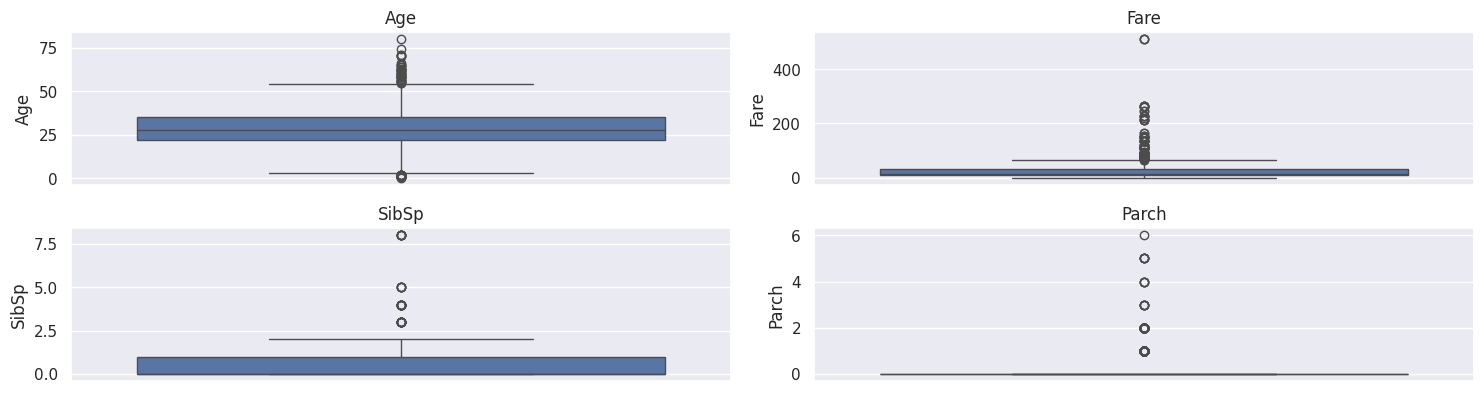

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'Fare','SibSp','Parch']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=titanic[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Berdasarkan output boxplot, terlihat adanya outlier pada masing-masing kolom.

Pada kolom Age, terdapat beberapa titik yang berada di luar rentang whiskers, yang menandakan keberadaan outlier. Pada kolom Fare, muncul titik-titik di luar whiskers, sehingga menunjukkan adanya outlier. Pada kolom SibSp, ditemukan titik-titik di luar rentang whiskers, yang juga mengindikasikan adanya outlier. Pada kolom Parch, terlihat titik-titik yang berada di luar whiskers, sehingga menunjukkan keberadaan outlier.

# **Pengecekan outlier dengan IQR**

In [30]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25) # Kuartil 1
    Q3 = data[column].quantile(0.75) # Kuartil 2
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk tiap kolom numerik
print("Jumlah Outlier berdasarkan IQR:")
for col in num_cols:
    outliers = detect_outliers_iqr(titanic, col)
    print(f"{col}: {len(outliers)} outliers")

Jumlah Outlier berdasarkan IQR:
Age: 66 outliers
Fare: 116 outliers
SibSp: 46 outliers
Parch: 213 outliers


Berdasarkan output, data tersebut memiliki outlier yaitu pada kolom Age memiliki 66 outliers, kolom Fare memiliki 116 outliers, kolom SibSp sebanyak 46 outliers dan kolom Parch sebanyak 213 outlier.

Outlier sendiri dapat diartikan sebagai nilai data yang berbeda secara ekstrim.

# **d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?**

Berdasarkan output boxplot, ditemukan outlier pada kolom Age, Fare, SibSp, dan Parch, yang ditandai dengan adanya titik-titik di luar rentang whiskers. Untuk menangani outlier tersebut, dapat digunakan beberapa metode, seperti winsorizing (mengganti outlier dengan batas IQR) jika data tersebut penting dan tidak boleh dihapus, atau menghapus outlier jika jumlahnya sedikit dan tidak berpengaruh signifikan terhadap distribusi data. Namun, dalam kasus ini, metode penghapusan tidak akan digunakan untuk menjaga dimensi data tetap utuh.


# **Metode Winsorizing**

In [31]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

In [32]:
for col in num_cols:
    winsorize_iqr(titanic, col) # Changed 'data' to 'titanic'

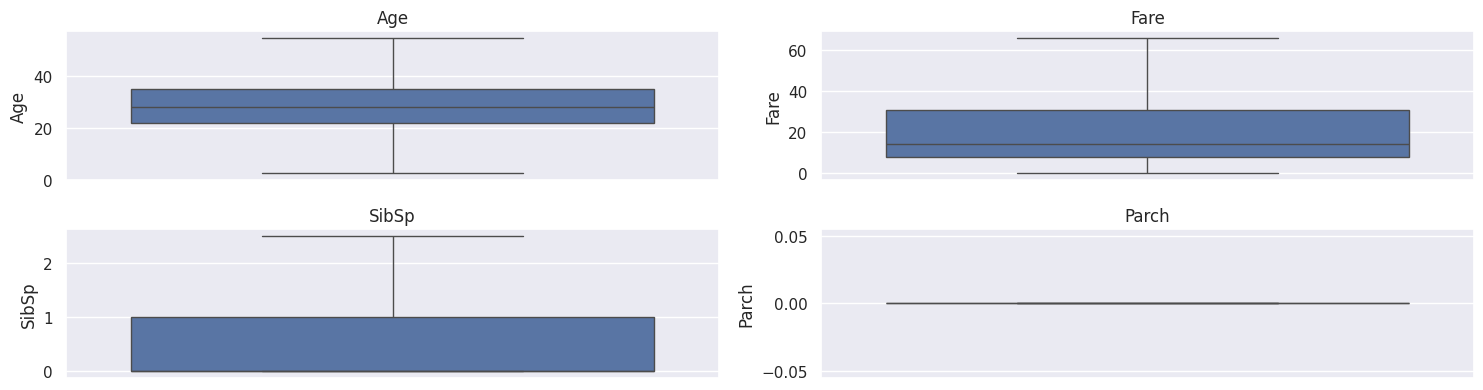

In [33]:
#cek boxplot lagi

num_cols = ['Age', 'Fare','SibSp','Parch']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=titanic[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Berdasarkan hasil output, seluruh titik kini berada dalam rentang whiskers, yang menunjukkan bahwa tidak ada lagi outlier pada kolom tersebut.

# **e. Jika dibutuhkan silahkan lakukan transformasi/standarisasi/scalling terhadap data tersebut?**

Perlu dilakukan tranformasi/standarisasi/scalling dikarenakan algoritma machine larning sensitif terhadap skala data. Salah satu metode yang dapat digunakan yaitu StandardScaler yang mana metode ini merupakan metode standardisasi yang sekaligus merupakan salah satu teknik scaling. Ketiganya kamu lakukan sekaligus dalam satu proses itu.

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
titanic[num_cols] = scaler.fit_transform(titanic[num_cols])

In [37]:
# Cek hasil scaling
print(titanic[num_cols].head())

        Age      Fare     SibSp  Parch
0 -0.583432 -0.820552  0.810220    0.0
1  0.742685  2.031623  0.810220    0.0
2 -0.251903 -0.787578 -0.602512    0.0
3  0.494038  1.419297  0.810220    0.0
4  0.494038 -0.781471 -0.602512    0.0


Output tersebut menunjukkan bahwa data pada kolom numerik (Age, Fare, SibSp, dan Parch) di dataset Titanic telah berhasil melalui proses standardisasi menggunakan StandardScaler. Setelah distandardisasi, nilai-nilai di setiap kolom tersebut diubah sehingga memiliki rata-rata (mean) mendekati 0 dan standar deviasi mendekati 1.

# **3. Modelling**

# **a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.**

Data training adalah bagian dari dataset yang digunakan untuk melatih model machine learning dengan mempelajari pola hubungan antara fitur (variabel independen) dan target (variabel dependen). Model menyesuaikan parameternya berdasarkan data ini untuk menghasilkan prediksi yang akurat. Sementara itu, data testing digunakan untuk menguji kinerja model terhadap data baru yang tidak pernah dilihat sebelumnya, guna memastikan kemampuan generalisasi model, bukan sekadar menghafal data training.

Dalam pembagian data, tidak ada aturan baku, tetapi praktik umum adalah memisahkan data dengan rasio 70-30 atau 80-20 antara training dan testing. Untuk dataset yang besar, pembagian 90-10 atau 95-5 bisa dipertimbangkan, asalkan tetap tersedia cukup data testing untuk evaluasi model secara akurat.

In [38]:
from sklearn.model_selection import train_test_split

# Assuming 'Survived' is your target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'Survived' is your target variable and dropping irrelevant features
X = titanic.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = titanic['Survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply MinMaxScaler to numerical features only
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [40]:
print(X_train)

[[0.15748031 1.         0.49038462 0.         0.         0.23228368]
 [0.49381327 0.5        0.54807692 0.         0.         0.15997709]
 [0.91901012 0.5        0.54807692 0.4        0.         0.56379277]
 ...
 [0.70753656 1.         0.49038462 0.         0.         0.11782389]
 [0.6287964  1.         0.64423077 0.4        0.         0.26510488]
 [0.76940382 0.5        1.         0.4        0.         0.5942006 ]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

# **b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?**

Data dibagi dengan proporsi 80% untuk training set dan 20% untuk testing set. Training set digunakan untuk melatih model dalam mengenali pola keselamatan berdasarkan fitur, sedangkan testing set digunakan untuk menguji kemampuan model dalam memprediksi keselamatan penumpang pada data yang belum pernah dilihat sebelumnya.

Alasan memilih pembagian 80% dan 20% karena total data sebanyak 891 → 712 data untuk pelatihan, 179 untuk pengujian. Sebanyak 712 data cukup untuk mempelajari pola dan 179 data cukup untuk evaluasi performa prediksi di penumpang baru.

In [41]:
from sklearn.model_selection import train_test_split

# Assuming 'Survived' is your target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **c. Buatlah model klasifikasi dari 3 algoritma yang berbeda, Jelaskan masing-masing model dan cara kerjanya**

Model klasifikasi diantaranya yaitu:


*   Decission Tree
*   Logistic Regression
*   K-NN






# **Decission Tree**

Decision tree secara harfiah diartikan sebagai pohon keputusan, sehingga model ini cara berpikirnya sama seperti pohon. Decision Tree ini merupakan algoritma klasifikasi dan regresi yang berbentuk struktur pohon, di mana setiap simpul (node) merepresentasikan pengambilan keputusan berdasarkan fitur tertentu, dan hasil akhirnya adalah prediksi kelas di daun pohon (leaf node).

In [42]:
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [43]:
X_train_selected = X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_test_selected = X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [44]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_selected, y_train)

DecisionTreeClassifier()

In [45]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [46]:
y_pred = classifier.predict(X_test_selected)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[80 30]
 [38 31]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       110
           1       0.51      0.45      0.48        69

    accuracy                           0.62       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.62      0.62       179



Berdasarkan hasil output diperoleh Akurasi Decision Tree sebesar 0.62. Artinya 62% prediksi model terhadap data uji sudah benar.

In [87]:
df = pandas.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


Cara Kerja Decision Tree:

Pilih Fitur Terbaik: Algoritma memilih fitur yang paling efektif untuk memisahkan kelas, biasanya menggunakan Gini Impurity.

Buat Cabang Berdasarkan Nilai Fitur: Misalnya, "Apakah Sex = female?"

True (Ya) -> ke cabang kiri

False (Tidak) -> ke cabang kanan

Ulangi Pembelahan: Proses ini diulang pada setiap cabang menggunakan fitur yang tersisa.

Berhenti: Proses berhenti jika semua data dalam cabang memiliki kelas yang sama, tidak ada fitur tersisa, atau mencapai kedalaman maksimum.

Struktur Decision Tree:

Root Node: Simpul awal yang berisi fitur pertama untuk membagi data.

Internal Node: Simpul di tengah yang mewakili keputusan lebih lanjut.

Leaf Node: Hasil akhir berupa kelas prediksi.

# **Logistic Regression**

Logistic Regression merupakan algoritma regresi yang digunakan untuk klasifikasi biner. Model ini bertujuan untuk memprediksi daru dia kelas berdasarkan fungsi logistik (sigmoid).

Pada dataset ini, model klasifikasi menggunakan Logistic Regression untuk memprediksi apakah penumpang titanik Selamat (Survived =1) atau Tidak Selamat (Survived =0)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [50]:
# Define categorical features for one-hot encoding
categorical_features = ['Sex', 'Embarked']

In [51]:
# Define numerical features (already scaled in previous steps)
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [52]:
# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Create a pipeline that includes preprocessing and the Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200)) # max_iter=200 to ensure convergence
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Create a pipeline that includes preprocessing and the Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200)) # max_iter=200 to ensure convergence
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=200))])

In [53]:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=200))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=200))])

Pipeline merupakan kombinasi dari preprocessing dan model dalam satu alur otomatis. Data yang diinput lalu diproses dan langsung diklasifikasikan oleh Logistic Regression.

 Akurasi Logistic Regression: 0.82

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.75      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



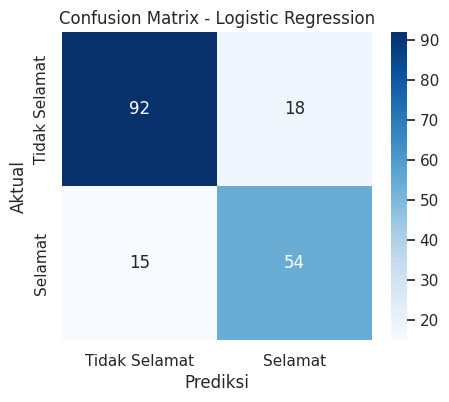

In [54]:
# Prediksi data uji
y_pred = pipeline.predict(X_test)

# Evaluasi model
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f" Akurasi Logistic Regression: {acc:.2f}")
print("\n Classification Report:\n", report)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Tidak Selamat", "Selamat"],
            yticklabels=["Tidak Selamat", "Selamat"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Aktual")
plt.xlabel("Prediksi")
plt.show()

Berdasarkan hasil output diperoleh Akurasi Logistic Regression sebesar 0.82. Artinya 82% prediksi model terhadap data uji sudah benar.

In [55]:
titanic.Survived.value_counts(normalize = True)

,proportion
Survived,
0,0.616162
1,0.383838


In [56]:
titanic.Survived.value_counts(normalize = True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


Cara kerja Model Logistic Regression

Pemilihan fitur Fitur dikategorikan menjadi dua jenis: Numerik: Pclas, Age, SibSp, Parch, Fare Kategorikal: Sex, Embarked
Preprocessing data Fitur kategorikal diubah menjadi bentuk numerik menggunakan One-Hot Encoding. Fitur numerik dilewatkan langsung tanpa transformasi khusus (passthrough). Proses ini dilakukan menggunakan ColumnTransformer.
Penyusunan pipeline Dibuat sebuah Pipeline yang terdiri dari: Langkah 1: preprocessor untuk mengolah data (encoding dan penggabungan fitur) Langkah 2: classifier menggunakan Logistic Regression sebagai algoritma klasifikasi.
Training Model Data latih (X_train, y_train) dimasukkan ke pipeline. Logistic Regression mempelajari hubungan antara fitur dan label (Survived) dengan mencari bobot optimal menggunakan fungsi loss logistik.
Prediksi data Model memproses data uji (X_test) dan memprediksi apakah penumpang selamat (1) atau tidak selamat (0). Prediksi dilakukan dengan menghitung probabilitas selamat menggunakan fungsi sigmoid.
Evaluasi Model Menggunakan metrik: Akurasi: proporsi prediksi yang benar Classification Report: precision, recall, f1-score untuk tiap kelas Confusion Matrix: visualisasi prediksi benar vs salah

# **K-Nearest Neighbor(KNN)**

K-Nearest Neighbor (KNN) memiliki arti terdekat dengan tetangganya. Model KNN ini ditentukan berdasarkan jumlah k nya dengan syarat k yang diperoleh itu ganjil (misal k=3 atau k=5). KNN ini akan mengasumsikan observasu yang kita tidak ketahui akan sama dengan tetangga terdekatnya.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
# Assuming X_train, X_test, y_train, y_test are already defined

# Select relevant features (exclude 'Name', 'Ticket', 'Cabin')
X_train_selected = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test_selected = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X_train_selected[['Sex', 'Embarked']])
encoded_features_test = encoder.transform(X_test_selected[['Sex', 'Embarked']])

# Combine encoded features with numerical features
X_train_encoded = np.concatenate([X_train_selected[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values, encoded_features], axis=1)
X_test_encoded = np.concatenate([X_test_selected[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values, encoded_features_test], axis=1)

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_encoded, y_train)

KNeighborsClassifier()

In [58]:
# Predict on the test data (using the encoded features)
y_pred = knn.predict(X_test_encoded)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



Berdasarkan hasil output diperoleh Akurasi KNN sebesar 0.83. Artinya 83% prediksi model terhadap data uji sudah benar.

Cara Kerja KNN

Proses data awal
Menentukan besar k atau jarak tetangga terdekat. Algoritma menghitung jarak antara data tersebut dengan seluruh data latih. Biasanya menggunakan jarak Euclidean.
Sitem memilih k data terdekat dari hasil perhitungan jarak tadi.
Sistem melakukan voting: Jika mayoritas tetangga termasuk kelas "Selamat", maka data baru diklasifikasikan sebagai "Selamat". Jika mayoritas "Tidak Selamat", maka hasilnya juga "Tidak Selamat".

### **d. Berapa nilai evaluasi dari maisng-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?**

Nilai-nilai evaluasi untuk masing-masing model sebagai berikut:


*   Model Decision Tree memiliki akurasi sebesar 62%. Artinya, hanya 62% dari prediksi yang dihasilkan oleh model Decision Tree yang benar. Angka ini lebih rendah jika dibandingkan dengan Logistic Regression dan KNN. Hal ini mungkin disebabkan oleh overfitting atau model yang kurang optimal, di mana struktur pohon yang terbentuk terlalu kompleks dan tidak mampu menggeneralisasi data uji dengan baik.
*   Model Logistic Regression memiliki akurasi 82%, yang berarti model ini dapat memprediksi dengan tepat 82% data uji. Logistic Regression bekerja dengan baik karena hubungan antara fitur (seperti Sex, Pclass, Fare) dan kemungkinan bertahan hidup cenderung linier.
*   Model KNN mencatatkan akurasi 83%. Artinya, 83% dari prediksi yang dibuat oleh model KNN sesuai dengan data aktual. KNN berfungsi dengan membandingkan data uji dengan tetangga terdekat pada data latih. Akurasi yang sedikit lebih tinggi daripada Logistic Regression menunjukkan bahwa pola keselamatan penumpang lebih mudah dikenali dengan pendekatan kedekatan antar karakteristik.





# **e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik**

Diperoleh nilai-nilai evaluasi untuk masing-masing model sebagai berikut: Model Logistic Regression memiliki akurasi sebesar 82%, yang berarti model ini mampu memprediksi dengan benar 82% dari data uji. Sementara itu, model KNN memiliki akurasi sedikit lebih tinggi, yaitu 83%, yang menunjukkan bahwa model ini dapat menghasilkan prediksi yang lebih akurat dibandingkan Logistic Regression. Sedangkan model Decision Tree mencatatkan akurasi sebesar 62%, yang lebih rendah dibandingkan kedua model sebelumnya. Dengan demikian, dari ketiga model yang diuji, model KNN menghasilkan akurasi tertinggi, yaitu sebesar 83%.

# **4. Evaluasi**

# **a. Berdasarkan classification report model terbaik, berapa nilai precission dan recall untuk prediksi penumpang yang "selamat"?**

Berdasarkan hasil output diperoleh Akurasi KNN diperoleh nilai precision dan recall untuk prediksi penumpang yang selamat adalah sebagai berikut:

Kelas 1 (Selamat)


*   Precision sebesar 0.80 -> dari semua prediksi "Selamat", 80% benar.
*   Recall sebesar 0.74 -> dari semua orang yang benar-benar "Selamat", 74% berhasil diprediksi.
*   F1-Score sebesar 0.77 -> gabungan antara precision dan recall untuk kelas ini sedikit lebih rendah dibandingkan dengan kelas 0 (Tidak Selamat).





# **b. Berapa banyak penumpang yang diprediksi selamat, dan berapa diantaranya benar-benar selamat?**

Banyak penumpang yang benar-benar selamat

True Positive (TP) = Recall x Support

TP = 0.74 X 69 = 51

Jadi, sebanyak 51 penumpang benar-benar selamat dari prediksi tersebut.

Banyak penumpang yang diprediksi selamat

Prediksi Selamat = True Positive (TP)/Precision

Prediksi Selamat = 51/0.80 = 64

Jadi, sebanyak 64 penumpang yang diprediksi selamat